In [1]:
import pandas as pd
df = pd.read_csv("analisis_frontal_miring_facelib.csv")

def calculate_difference(row):
    if row['gt'] == row['emotion_before'] and row['gt'] == row['emotion_after']:
        return row['prob_after'] - row['prob_before']
    
df['probability_difference'] = df.apply(calculate_difference, axis=1)

def calculate_status(row):
    if row['probability_difference'] > 0:
        return 'meningkat'
    elif row['probability_difference'] < 0:
        return 'turun'
    else:
        return 'tidak berubah'

df['status'] = df.apply(calculate_status, axis=1)

missing_before = df["emotion_before"].isna().sum()
missing_after = df["emotion_after"].isna().sum()
print(f"Gagal deteksi before: {missing_before}")
print(f"Gagal deteksi after: {missing_after}")

correct_before = (df["gt"] == df["emotion_before"]).sum()
correct_after = (df["gt"] == df["emotion_after"]).sum()
print("\n")
print("Correct before:", correct_before)
print("Correct after:", correct_after)

accuracy_before = (df["gt"] == df["emotion_before"]).mean() * 100
accuracy_after = (df["gt"] == df["emotion_after"]).mean() * 100
print("\n")
print(f"Akurasi before: {accuracy_before:.2f}%")
print(f"Akurasi after: {accuracy_after:.2f}%")

accuracy_per_class_before = ((df["gt"] == df["emotion_before"]).groupby(df["gt"]).mean() * 100)
accuracy_per_class_after = ((df["gt"] == df["emotion_after"]).groupby(df["gt"]).mean() * 100)
print("\n")
print("Akurasi per emosi (before):")
print(accuracy_per_class_before)
print("\n")
print("Akurasi per emosi (after):")
print(accuracy_per_class_after)

categories = df['gt'].unique()
sum_peningkatan = df[df["status"] == "meningkat"].groupby("gt").size()
sum_peningkatan = sum_peningkatan.reindex(categories, fill_value=0)

sum_penurunan = df[df["status"] == "turun"].groupby("gt").size()
sum_penurunan = sum_penurunan.reindex(categories, fill_value=0)

print("\n")
print("Jumlah Peningkatan per Kelas:")
print(sum_peningkatan)
print("\nJumlah Penurunan per Kelas:")
print(sum_penurunan)



Gagal deteksi before: 0
Gagal deteksi after: 0


Correct before: 243
Correct after: 212


Akurasi before: 48.89%
Akurasi after: 42.66%


Akurasi per emosi (before):
gt
angry       70.422535
disgust      1.408451
fear        25.352113
happy       77.464789
neutral     45.070423
sad         57.746479
surprise    64.788732
dtype: float64


Akurasi per emosi (after):
gt
angry       61.971831
disgust      1.408451
fear        46.478873
happy       54.929577
neutral     30.985915
sad         70.422535
surprise    32.394366
dtype: float64


Jumlah Peningkatan per Kelas:
gt
angry       16
disgust      0
fear        10
happy       14
neutral     13
sad         21
surprise     5
dtype: int64

Jumlah Penurunan per Kelas:
gt
angry       21
disgust      1
fear         6
happy       22
neutral      3
sad         14
surprise    16
dtype: int64


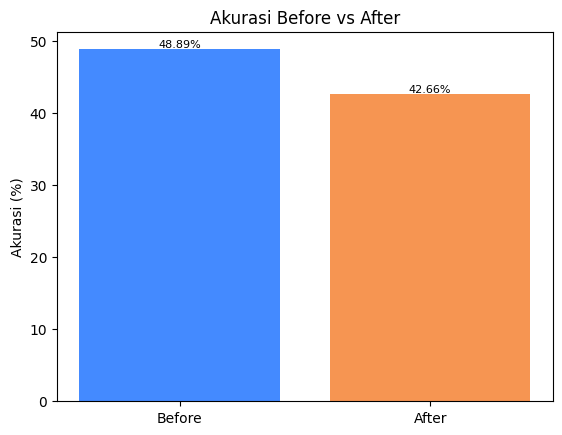

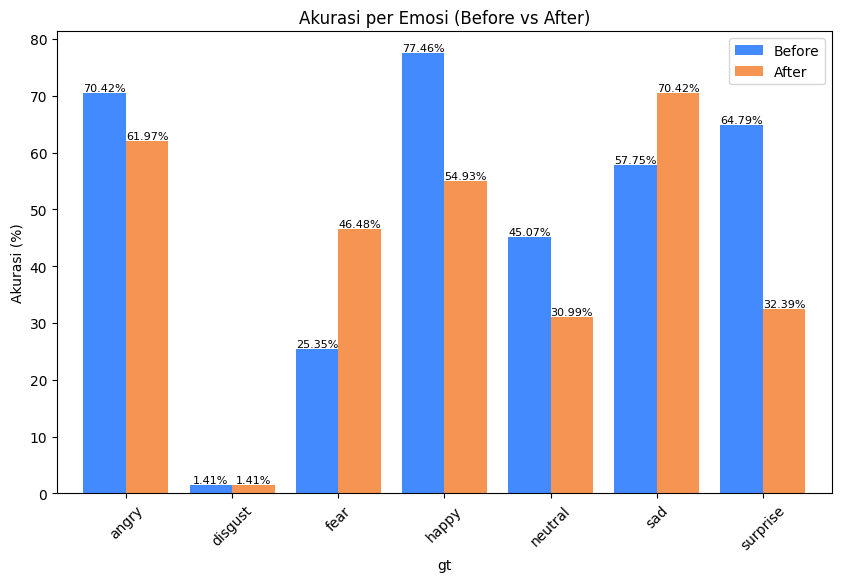

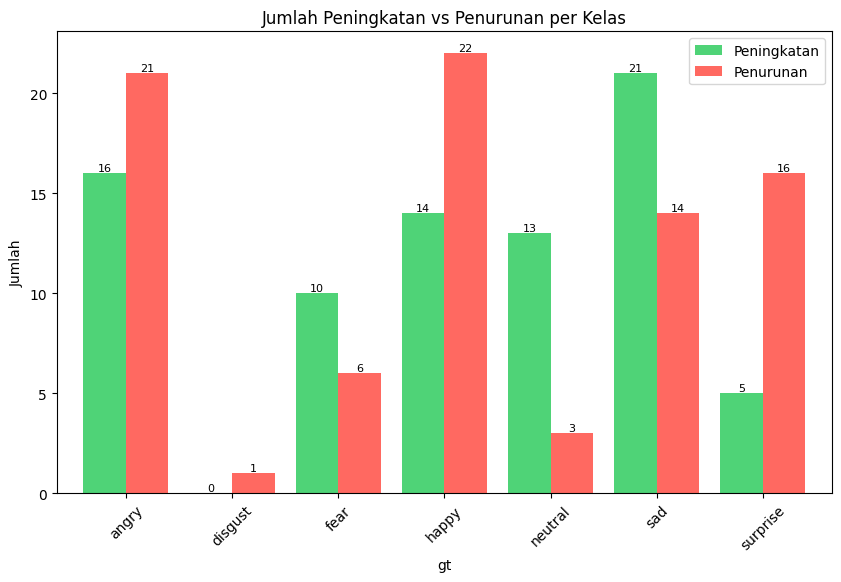

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

sz = (10, 6)
w = 0.8

fig, ax = plt.subplots()
bars = ax.bar(["Before", "After"], [accuracy_before, accuracy_after], color=["#448aff", "#f69552"], width=w)
ax.set_title("Akurasi Before vs After")
ax.set_ylabel("Akurasi (%)")

for p in bars:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )
fig.savefig("fig/facelib_miring_akurasi_all.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=sz)
df_accuracy = pd.DataFrame({
    "Before": accuracy_per_class_before,
    "After": accuracy_per_class_after
})
df_accuracy.plot(kind='bar', ax=ax, width=w, color=["#448aff", "#f69552"])  # Custom colors
ax.set_title("Akurasi per Emosi (Before vs After)")
ax.set_ylabel("Akurasi (%)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )
fig.savefig("fig/facelib_miring_akurasi_per_kelas.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=sz)
df_summary = pd.DataFrame({
    "Peningkatan": sum_peningkatan,
    "Penurunan": sum_penurunan
})
df_summary.plot(kind='bar', ax=ax, width=w, color=["#4fd377", "#ff6961"])  # Custom colors
ax.set_title("Jumlah Peningkatan vs Penurunan per Kelas")
ax.set_ylabel("Jumlah")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )
fig.savefig("fig/facelib_miring_komparasi_up_down.png", dpi=300)
plt.show()
